In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
from tabulate import tabulate

In [3]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11,7)})

IRIS

In [70]:
iris = load_iris()
X = iris.data  # cechy
y = iris.target  # etykiety

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

<Axes: >

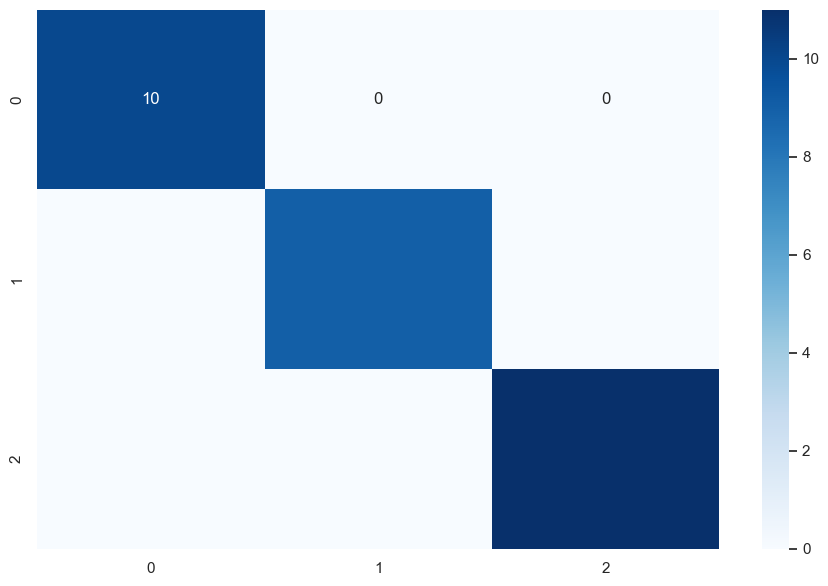

In [73]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

In [74]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Dla 0 
tp = 10 [0,0], fn_0 = 0 wszystkie w wierszu poza tp, tn = 20 reszta, fp = 0 wszystkie w kolumnie poza tp

Podobnie dla reszty


In [75]:
#recall = tp/(tp+fn)
#precision = tp/(tp+fp)
#f-measure = 2*recall*precision/(recall+precision)
#accuracy = dobrze_przyporządkowane/ilość_wszystkich_przyporządkowań

In [96]:
print('F1_score:',f1_score(y_test, y_pred, average='weighted'))
print('Accuracy', accuracy_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

F1_score: 1.0
Accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [89]:
knn_classifier = KNeighborsClassifier()

num_folds = [2, 5, 10]
results = []

for fold in num_folds:
    kfold = KFold(n_splits=fold, shuffle=True, random_state=42)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=kfold)
    mean_score = scores.mean()
    scores_list = scores.tolist() 
    results.append([f'{fold}-fold', scores_list, mean_score])

# Wydrukowanie tabeli
headers = ['Cross Validation', 'Scores', 'Mean Score']
print(tabulate(results, headers=headers, tablefmt='pretty'))

+------------------+----------------------------------------------------------------------------------------------------------------+--------------------+
| Cross Validation |                                                     Scores                                                     |     Mean Score     |
+------------------+----------------------------------------------------------------------------------------------------------------+--------------------+
|      2-fold      |                                           [0.9, 0.9333333333333333]                                            | 0.9166666666666667 |
|      5-fold      |             [0.9166666666666666, 0.9583333333333334, 0.9166666666666666, 0.9166666666666666, 1.0]              | 0.9416666666666667 |
|     10-fold      | [0.8333333333333334, 1.0, 0.9166666666666666, 1.0, 0.8333333333333334, 1.0, 0.8333333333333334, 1.0, 1.0, 1.0] | 0.9416666666666668 |
+------------------+--------------------------------------------------

In [90]:
knn_classifier = KNeighborsClassifier()

num_folds = [2, 5, 10]
results = []

for fold in num_folds:
    kfold = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=kfold)
    mean_score = scores.mean()
    scores_list = scores.tolist() 
    results.append([f'{fold}-fold', scores_list, mean_score])

# Wydrukowanie tabeli
headers = ['Cross Validation', 'Scores', 'Mean Score']
print(tabulate(results, headers=headers, tablefmt='pretty'))

+------------------+-------------------------------------------------------------------------------------------------------------------------------+--------------------+
| Cross Validation |                                                            Scores                                                             |     Mean Score     |
+------------------+-------------------------------------------------------------------------------------------------------------------------------+--------------------+
|      2-fold      |                                                  [0.95, 0.9666666666666667]                                                   | 0.9583333333333333 |
|      5-fold      |                           [0.9583333333333334, 0.9583333333333334, 0.875, 0.9583333333333334, 1.0]                            |        0.95        |
|     10-fold      | [0.8333333333333334, 1.0, 1.0, 0.9166666666666666, 0.9166666666666666, 0.8333333333333334, 1.0, 0.9166666666666666, 1.0, 1.0] | 0

In [91]:
knn_classifier = KNeighborsClassifier()
#walidacja bez shuffle

num_folds = [2, 5, 10]
results = []

for fold in num_folds:
    kfold = KFold(n_splits=fold)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=kfold)
    mean_score = scores.mean()
    scores_list = scores.tolist() 
    results.append([f'{fold}-fold', scores_list, mean_score])

# Wydrukowanie tabeli
headers = ['Cross Validation', 'Scores', 'Mean Score']
print(tabulate(results, headers=headers, tablefmt='pretty'))

+------------------+----------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
| Cross Validation |                                                                    Scores                                                                    |     Mean Score     |
+------------------+----------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
|      2-fold      |                                                   [0.9166666666666666, 0.9333333333333333]                                                   |       0.925        |
|      5-fold      |                                  [0.9583333333333334, 0.9583333333333334, 0.875, 0.9583333333333334, 0.875]                                  |       0.925        |
|     10-fold      | [1.0, 0.9166666666666666, 1.0, 0.9166666666666666, 0.9

In [93]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut() # w przypadku małej ilości danych - super
scores = cross_val_score(knn_classifier, X_train, y_train, cv=loo)
scores.mean()*100

94.16666666666667

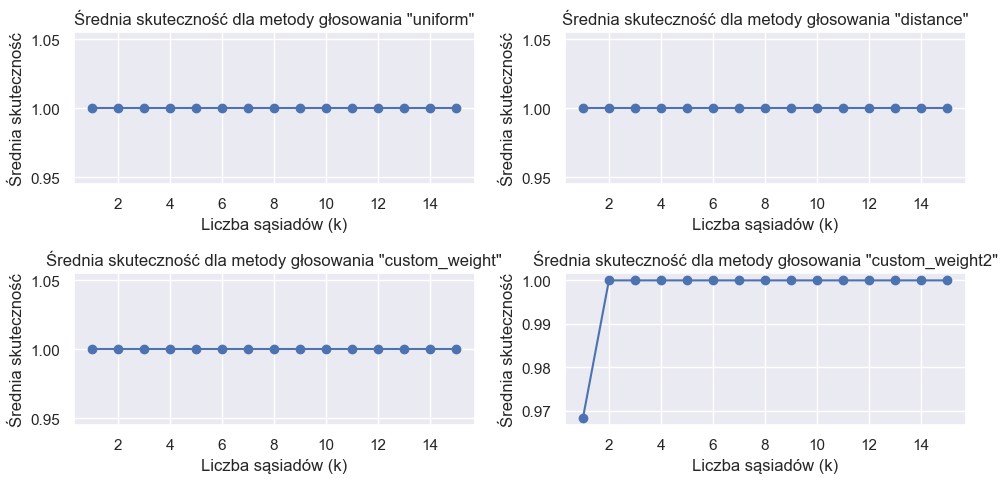

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def custom_weight(distances):
    return np.exp(-(distances ** 2))

def custom_weight2(distances):
    max_distance = np.max(distances)
    return np.where(distances <= max_distance, 1 - distances / max_distance, 0)

num_k = range(1, 16)
voting_methods = ['uniform', 'distance', 'custom_weight', 'custom_weight2']
mean_scores = {'uniform': [], 'distance': [], 'custom_weight': [], 'custom_weight2': []}
scores_list = {'uniform': [], 'distance': [], 'custom_weight': [], 'custom_weight2': []}


for voting_method in voting_methods:
    for k in num_k:
        if voting_method == 'custom_weight':
            knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=custom_weight)
        elif voting_method == 'custom_weight2':
            knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=custom_weight2)
        else:
            knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=voting_method)
        
        knn_classifier.fit(X_train, y_train)
        y_pred = knn_classifier.predict(X_test)
        scores = f1_score(y_test, y_pred, average='macro')
        
        scores_list[voting_method].append(scores)
        mean_score = scores.mean()
        mean_scores[voting_method].append(mean_score)

plt.figure(figsize=(10, 5))

# uniform
plt.subplot(2, 2, 1)
plt.plot(num_k, mean_scores['uniform'], marker='o')
plt.title('Średnia skuteczność dla metody głosowania "uniform"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

# distance
plt.subplot(2, 2, 2)
plt.plot(num_k, mean_scores['distance'], marker='o')
plt.title('Średnia skuteczność dla metody głosowania "distance"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

#custom1
plt.subplot(2, 2, 3)
plt.plot(num_k, mean_scores['custom_weight'], marker='o')
plt.title('Średnia skuteczność dla metody głosowania "custom_weight"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

#custom2
plt.subplot(2, 2, 4)
plt.plot(num_k, mean_scores['custom_weight2'], marker='o')
plt.title('Średnia skuteczność dla metody głosowania "custom_weight2"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

plt.tight_layout()
plt.show()

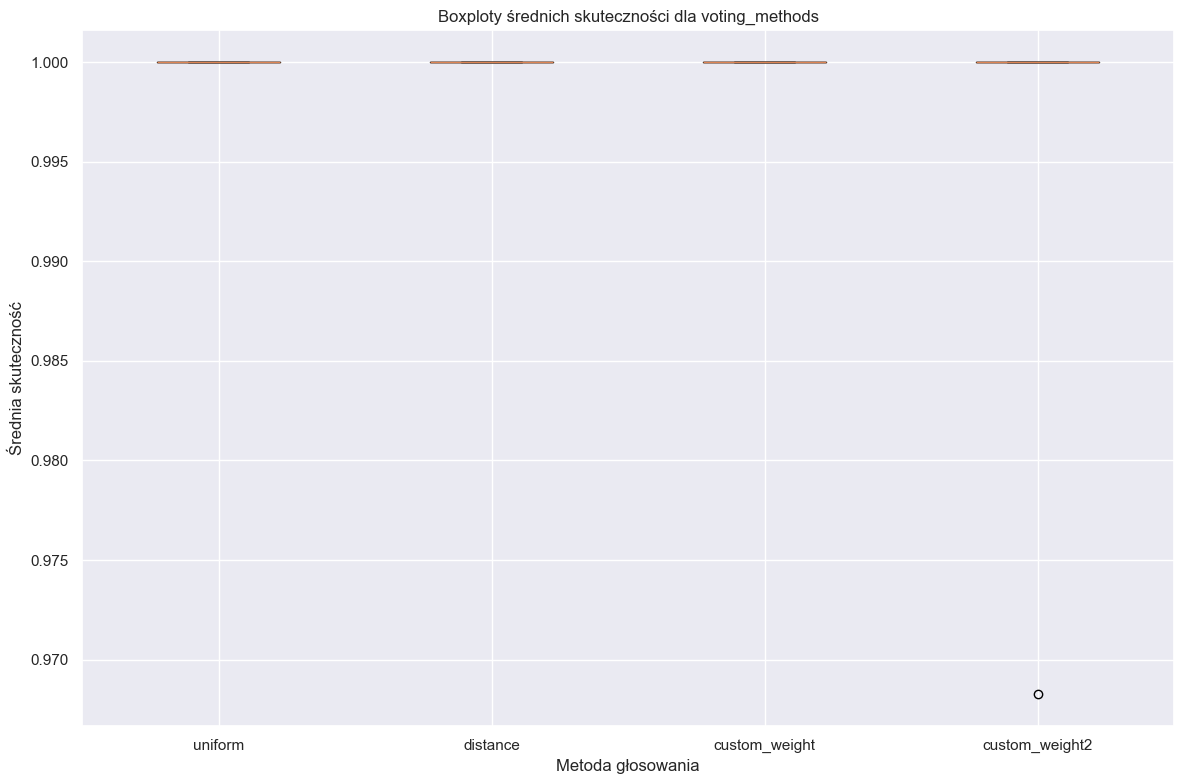

In [95]:
def generate_mean_boxplots(mean_scores):
    plt.figure(figsize=(12, 8))

    methods = list(mean_scores.keys())
    data = [mean_scores[method] for method in methods]

    plt.boxplot(data, labels=methods)
    plt.title('Boxploty średnich skuteczności dla voting_methods')
    plt.xlabel('Metoda głosowania')
    plt.ylabel('Średnia skuteczność')

    plt.tight_layout()
    plt.show()

generate_mean_boxplots(mean_scores)

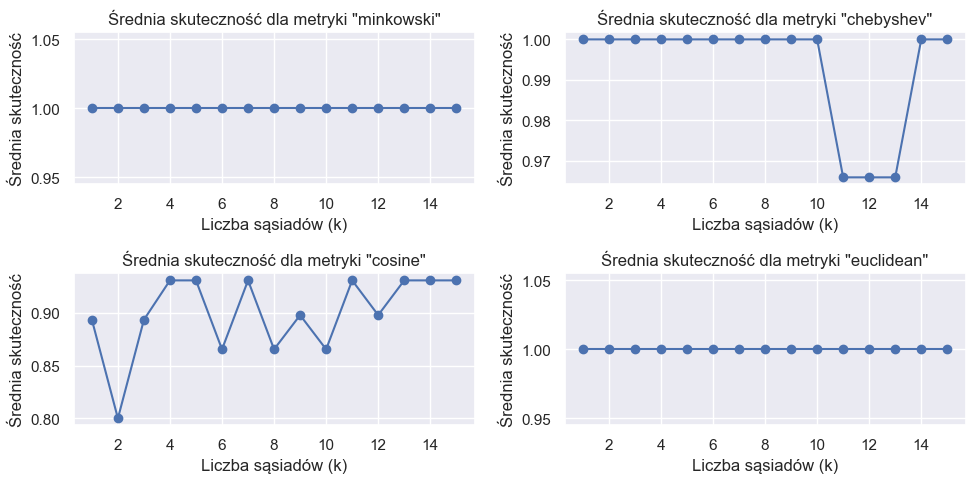

In [97]:
num_k = range(1, 16)
metrics = ['minkowski', 'chebyshev', 'cosine', 'euclidean']
mean_scores2 = {'minkowski': [], 'chebyshev': [], 'cosine': [], 'euclidean': []}

for metric in metrics:
    for k in num_k:
        knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_classifier.fit(X_train, y_train)
        y_pred = knn_classifier.predict(X_test)
        scores = f1_score(y_test, y_pred, average='macro')
        
        mean_score = scores.mean()
        mean_scores2[metric].append(mean_score)

# Tworzenie wykresów
plt.figure(figsize=(10, 5))

# minkowski
plt.subplot(2, 2, 1)
plt.plot(num_k, mean_scores2['minkowski'], marker='o')
plt.title('Średnia skuteczność dla metryki "minkowski"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

# chebyshev
plt.subplot(2, 2, 2)
plt.plot(num_k, mean_scores2['chebyshev'], marker='o')
plt.title('Średnia skuteczność dla metryki "chebyshev"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

plt.subplot(2, 2, 3)
plt.plot(num_k, mean_scores2['cosine'], marker='o')
plt.title('Średnia skuteczność dla metryki "cosine"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

plt.subplot(2, 2, 4)
plt.plot(num_k, mean_scores2['euclidean'], marker='o')
plt.title('Średnia skuteczność dla metryki "euclidean"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

plt.tight_layout()
plt.show()

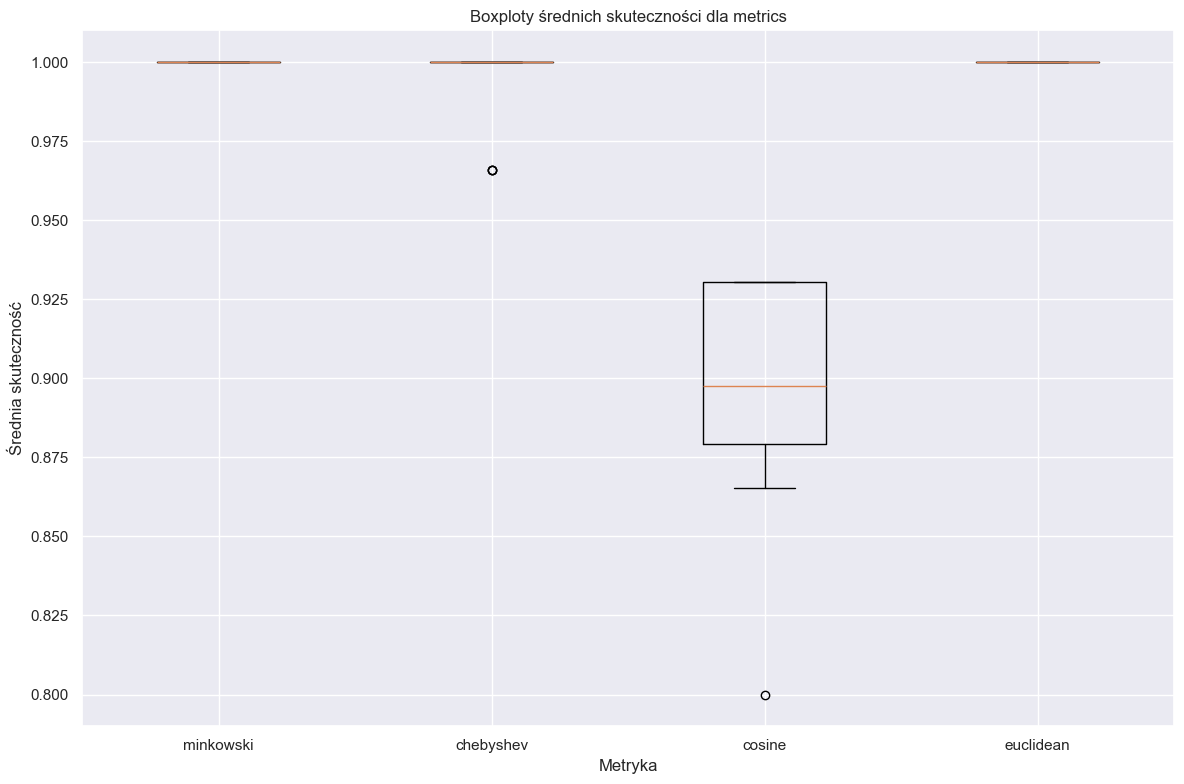

In [98]:
def generate_mean_boxplots2(mean_scores):
    plt.figure(figsize=(12, 8))

    methods = list(mean_scores.keys())
    data = [mean_scores[method] for method in methods]

    plt.boxplot(data, labels=methods)
    plt.title('Boxploty średnich skuteczności dla metrics')
    plt.xlabel('Metryka')
    plt.ylabel('Średnia skuteczność')

    plt.tight_layout()
    plt.show()

generate_mean_boxplots2(mean_scores2)

GLASS

In [100]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 

In [101]:
y = y.squeeze()

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<Axes: >

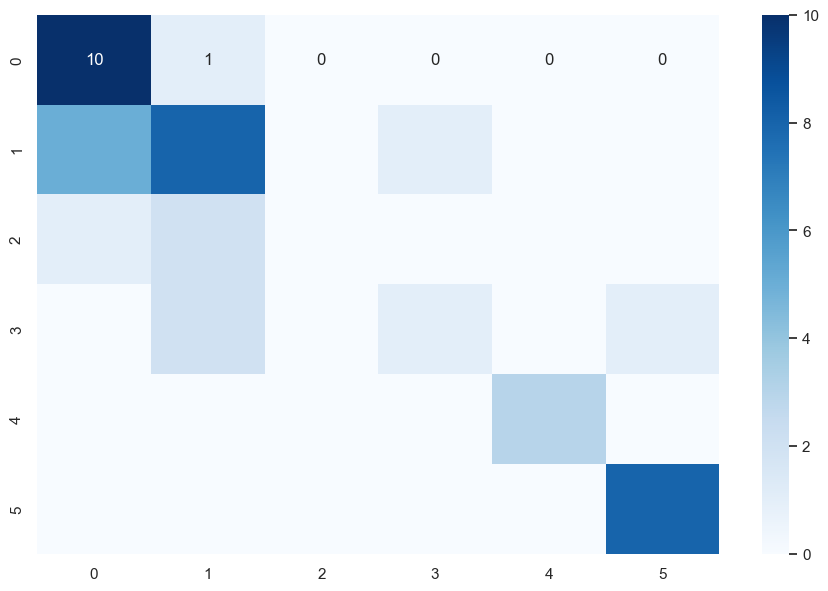

In [103]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

In [104]:
confusion_matrix(y_test, y_pred)

array([[10,  1,  0,  0,  0,  0],
       [ 5,  8,  0,  1,  0,  0],
       [ 1,  2,  0,  0,  0,  0],
       [ 0,  2,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  8]], dtype=int64)

In [105]:
print('F1_score:',f1_score(y_test, y_pred, average='weighted'))
print('Accuracy', accuracy_score(y_test, y_pred))

F1_score: 0.6583067335461316
Accuracy 0.6976744186046512


In [106]:
knn_classifier = KNeighborsClassifier()

num_folds = [2, 5, 10]
results = []

for fold in num_folds:
    kfold = KFold(n_splits=fold, shuffle=True, random_state=42)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=kfold)
    mean_score = scores.mean()
    scores_list = scores.tolist() 
    results.append([f'{fold}-fold', scores_list, mean_score])

# Wydrukowanie tabeli
headers = ['Cross Validation', 'Scores', 'Mean Score']
print(tabulate(results, headers=headers, tablefmt='pretty'))

+------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
| Cross Validation |                                                                                                   Scores                                                                                                   |     Mean Score     |
+------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
|      2-fold      |                                                                                  [0.686046511627907, 0.5647058823529412]                                                                                   | 0.6253761969904241 |
|      5-fol

In [107]:
knn_classifier = KNeighborsClassifier()

num_folds = [2, 5, 10]
results = []

for fold in num_folds:
    kfold = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=kfold)
    mean_score = scores.mean()
    scores_list = scores.tolist() 
    results.append([f'{fold}-fold', scores_list, mean_score])

# Wydrukowanie tabeli
headers = ['Cross Validation', 'Scores', 'Mean Score']
print(tabulate(results, headers=headers, tablefmt='pretty'))

+------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
| Cross Validation |                                                                                                  Scores                                                                                                  |     Mean Score     |
+------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
|      2-fold      |                                                                                 [0.6046511627906976, 0.5647058823529412]                                                                                 | 0.5846785225718194 |
|      5-fold      |

c:\Users\kjani\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


In [108]:
knn_classifier = KNeighborsClassifier()

num_folds = [2, 5, 10]
results = []

for fold in num_folds:
    kfold = StratifiedKFold(n_splits=fold)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=kfold)
    mean_score = scores.mean()
    scores_list = scores.tolist() 
    results.append([f'{fold}-fold', scores_list, mean_score])

# Wydrukowanie tabeli
headers = ['Cross Validation', 'Scores', 'Mean Score']
print(tabulate(results, headers=headers, tablefmt='pretty'))

+------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
| Cross Validation |                                                                                          Scores                                                                                           |     Mean Score     |
+------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
|      2-fold      |                                                                         [0.5813953488372093, 0.6588235294117647]                                                                          | 0.620109439124487  |
|      5-fold      |                                                   [0.6, 0.6

c:\Users\kjani\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


In [112]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut() # w przypadku małej ilości danych - super
scores = cross_val_score(knn_classifier, X_train, y_train, cv=loo)
scores.mean()*100

69.5906432748538

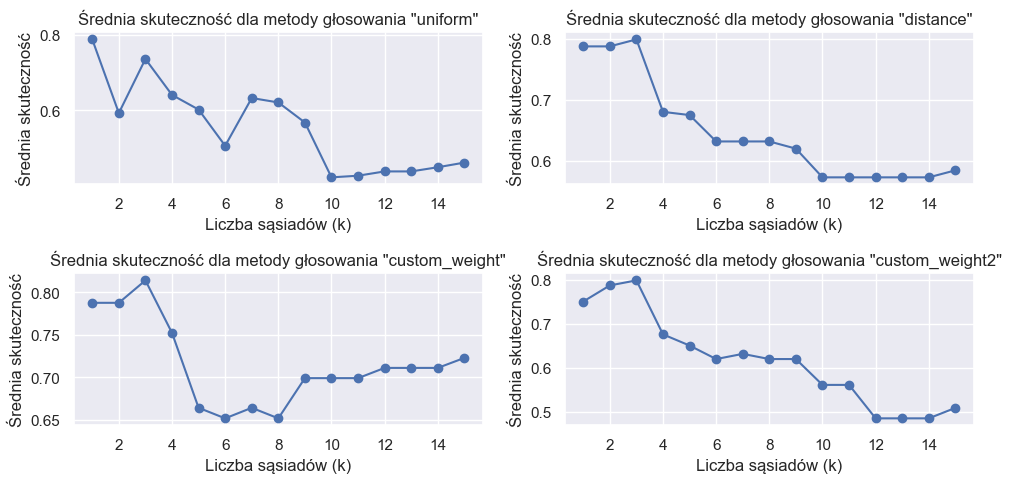

In [113]:
def custom_weight(distances):
    return np.exp(-(distances ** 2))

def custom_weight2(distances):
    max_distance = np.max(distances)
    return np.where(distances <= max_distance, 1 - distances / max_distance, 0)

num_k = range(1, 16)
voting_methods = ['uniform', 'distance', 'custom_weight', 'custom_weight2']
mean_scores = {'uniform': [], 'distance': [], 'custom_weight': [], 'custom_weight2': []}
scores_list = {'uniform': [], 'distance': [], 'custom_weight': [], 'custom_weight2': []}


for voting_method in voting_methods:
    for k in num_k:
        if voting_method == 'custom_weight':
            knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=custom_weight)
        elif voting_method == 'custom_weight2':
            knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=custom_weight2)
        else:
            knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=voting_method)
        
        knn_classifier.fit(X_train, y_train)
        y_pred = knn_classifier.predict(X_test)
        scores = f1_score(y_test, y_pred, average='macro')
        
        scores_list[voting_method].append(scores)
        mean_score = scores.mean()
        mean_scores[voting_method].append(mean_score)

plt.figure(figsize=(10, 5))

# uniform
plt.subplot(2, 2, 1)
plt.plot(num_k, mean_scores['uniform'], marker='o')
plt.title('Średnia skuteczność dla metody głosowania "uniform"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

# distance
plt.subplot(2, 2, 2)
plt.plot(num_k, mean_scores['distance'], marker='o')
plt.title('Średnia skuteczność dla metody głosowania "distance"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

#custom1
plt.subplot(2, 2, 3)
plt.plot(num_k, mean_scores['custom_weight'], marker='o')
plt.title('Średnia skuteczność dla metody głosowania "custom_weight"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

#custom2
plt.subplot(2, 2, 4)
plt.plot(num_k, mean_scores['custom_weight2'], marker='o')
plt.title('Średnia skuteczność dla metody głosowania "custom_weight2"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

plt.tight_layout()
plt.show()

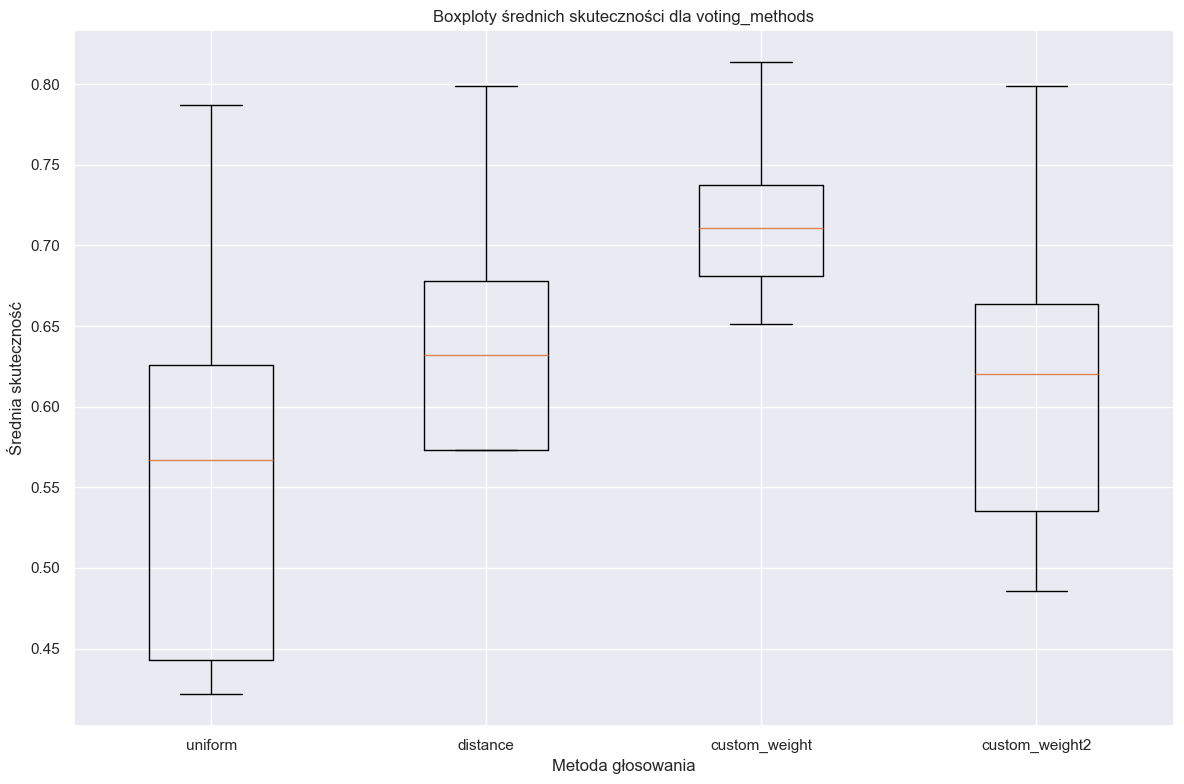

In [114]:
generate_mean_boxplots(mean_scores)

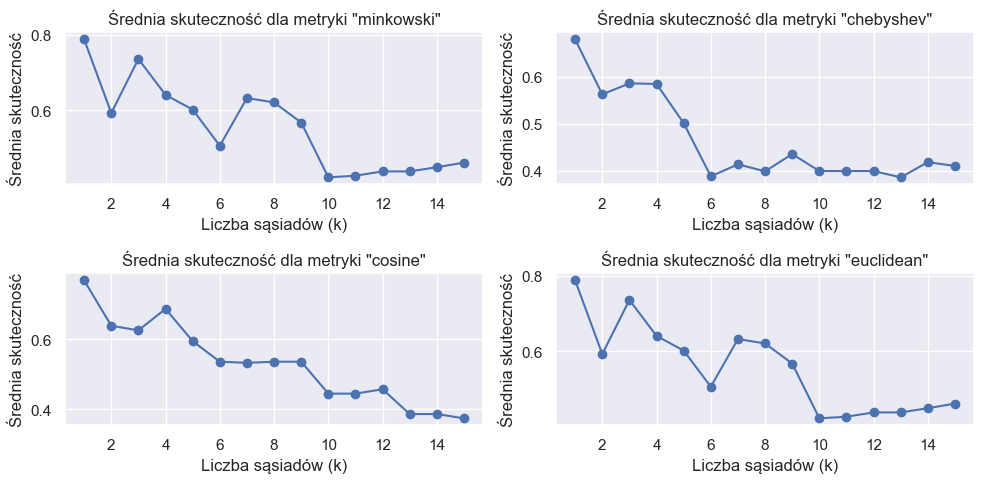

In [115]:
num_k = range(1, 16)
metrics = ['minkowski', 'chebyshev', 'cosine', 'euclidean']
mean_scores2 = {'minkowski': [], 'chebyshev': [], 'cosine': [], 'euclidean': []}
for metric in metrics:
    for k in num_k:
        knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_classifier.fit(X_train, y_train)
        y_pred = knn_classifier.predict(X_test)
        scores = f1_score(y_test, y_pred, average='macro')
        
        mean_score = scores
        mean_scores[voting_method].append(mean_score)

        mean_scores2[metric].append(mean_score)

# Tworzenie wykresów
plt.figure(figsize=(10, 5))

# minkowski
plt.subplot(2, 2, 1)
plt.plot(num_k, mean_scores2['minkowski'], marker='o')
plt.title('Średnia skuteczność dla metryki "minkowski"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

# chebyshev
plt.subplot(2, 2, 2)
plt.plot(num_k, mean_scores2['chebyshev'], marker='o')
plt.title('Średnia skuteczność dla metryki "chebyshev"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

plt.subplot(2, 2, 3)
plt.plot(num_k, mean_scores2['cosine'], marker='o')
plt.title('Średnia skuteczność dla metryki "cosine"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

plt.subplot(2, 2, 4)
plt.plot(num_k, mean_scores2['euclidean'], marker='o')
plt.title('Średnia skuteczność dla metryki "euclidean"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

plt.tight_layout()
plt.show()

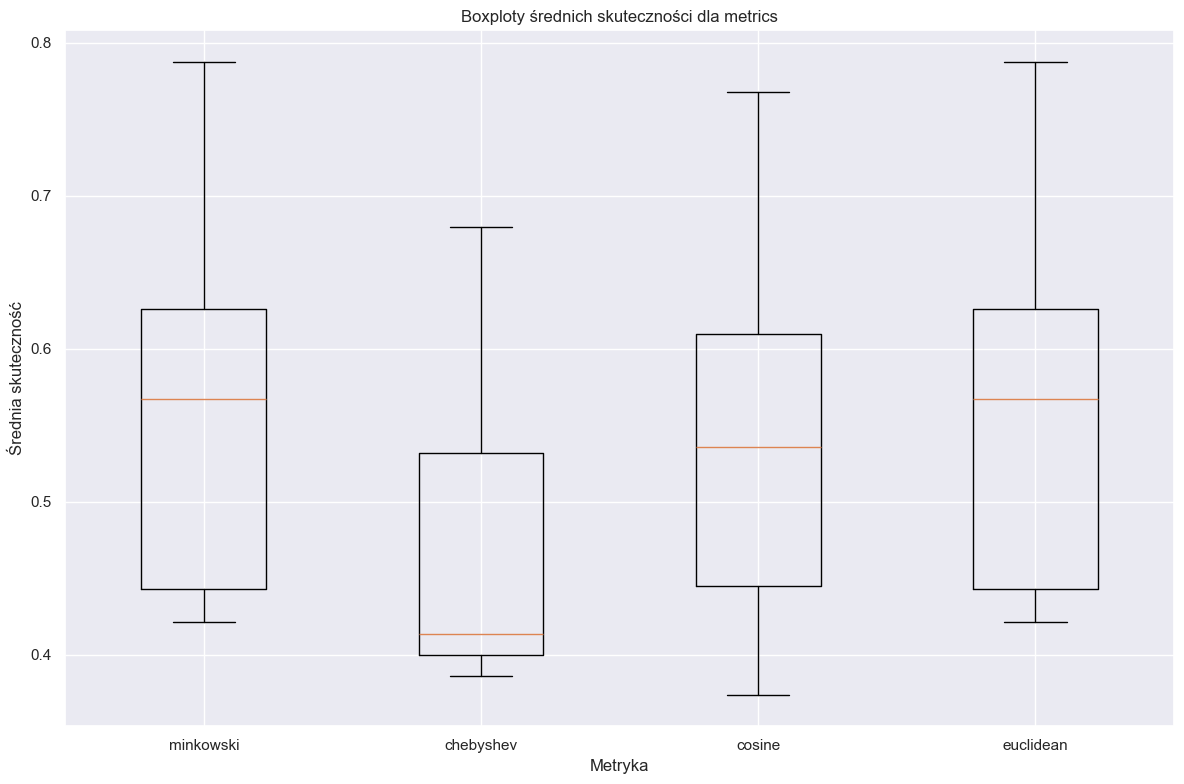

In [116]:
generate_mean_boxplots2(mean_scores2)

WINE

In [117]:
wine = load_wine(as_frame=True)
X = wine.data
y = wine.target

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<Axes: >

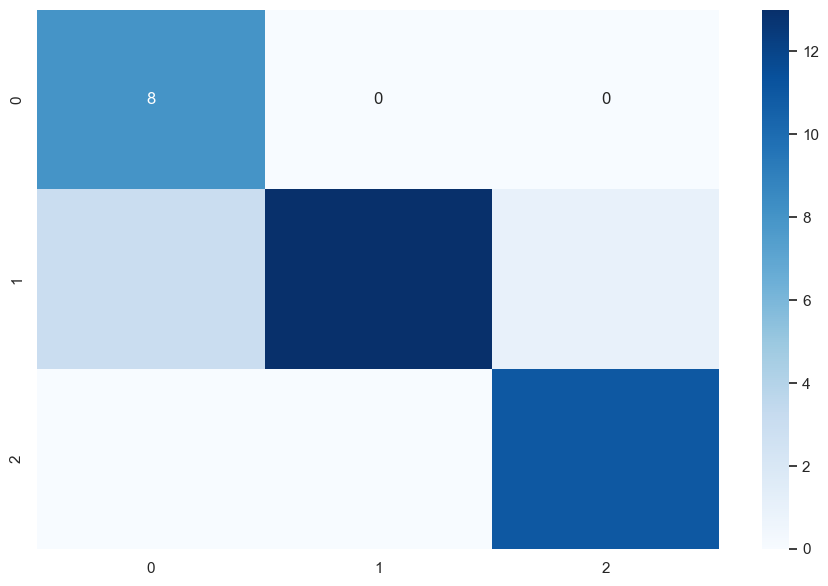

In [119]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

In [120]:
confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0],
       [ 3, 13,  1],
       [ 0,  0, 11]], dtype=int64)

In [121]:
from sklearn.metrics import classification_report
print('F1_score:',f1_score(y_test, y_pred, average='weighted'))
print('Accuracy', accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

F1_score: 0.8886642935842021
Accuracy 0.8888888888888888
              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.76      0.87        17
           2       0.92      1.00      0.96        11

    accuracy                           0.89        36
   macro avg       0.88      0.92      0.89        36
weighted avg       0.91      0.89      0.89        36



In [122]:
knn_classifier = KNeighborsClassifier()

num_folds = [2, 5, 10]
results = []

for fold in num_folds:
    kfold = KFold(n_splits=fold, shuffle=True, random_state=42)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=kfold)
    mean_score = scores.mean()
    scores_list = scores.tolist() 
    results.append([f'{fold}-fold', scores_list, mean_score])

# Wydrukowanie tabeli
headers = ['Cross Validation', 'Scores', 'Mean Score']
print(tabulate(results, headers=headers, tablefmt='pretty'))

+------------------+-------------------------------------------------------------------------------------------------+--------------------+
| Cross Validation |                                             Scores                                              |     Mean Score     |
+------------------+-------------------------------------------------------------------------------------------------+--------------------+
|      2-fold      |                                    [1.0, 0.9577464788732394]                                    | 0.9788732394366197 |
|      5-fold      |             [1.0, 0.9655172413793104, 0.9285714285714286, 1.0, 0.9642857142857143]              | 0.9716748768472907 |
|     10-fold      | [0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9285714285714286, 0.9285714285714286] | 0.9790476190476192 |
+------------------+-------------------------------------------------------------------------------------------------+--------------------+


In [123]:
knn_classifier = KNeighborsClassifier()

num_folds = [2, 5, 10]
results = []

for fold in num_folds:
    kfold = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=kfold)
    mean_score = scores.mean()
    scores_list = scores.tolist() 
    results.append([f'{fold}-fold', scores_list, mean_score])

# Wydrukowanie tabeli
headers = ['Cross Validation', 'Scores', 'Mean Score']
print(tabulate(results, headers=headers, tablefmt='pretty'))

+------------------+----------------------------------------------------------------------------------+--------------------+
| Cross Validation |                                      Scores                                      |     Mean Score     |
+------------------+----------------------------------------------------------------------------------+--------------------+
|      2-fold      |                     [0.9859154929577465, 0.971830985915493]                      | 0.9788732394366197 |
|      5-fold      |      [1.0, 0.9655172413793104, 0.9642857142857143, 0.9642857142857143, 1.0]      | 0.9788177339901478 |
|     10-fold      | [1.0, 1.0, 1.0, 1.0, 1.0, 0.9285714285714286, 1.0, 0.9285714285714286, 1.0, 1.0] | 0.9857142857142858 |
+------------------+----------------------------------------------------------------------------------+--------------------+


In [124]:
knn_classifier = KNeighborsClassifier()

num_folds = [2, 5, 10]
results = []

for fold in num_folds:
    kfold = KFold(n_splits=fold)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=kfold)
    mean_score = scores.mean()
    scores_list = scores.tolist() 
    results.append([f'{fold}-fold', scores_list, mean_score])

# Wydrukowanie tabeli
headers = ['Cross Validation', 'Scores', 'Mean Score']
print(tabulate(results, headers=headers, tablefmt='pretty'))

+------------------+-------------------------------------------------------------------------------------------------------------------------------+--------------------+
| Cross Validation |                                                            Scores                                                             |     Mean Score     |
+------------------+-------------------------------------------------------------------------------------------------------------------------------+--------------------+
|      2-fold      |                                           [0.9859154929577465, 0.9436619718309859]                                            | 0.9647887323943662 |
|      5-fold      |                            [1.0, 0.9655172413793104, 0.9285714285714286, 0.8928571428571429, 1.0]                             | 0.9573891625615765 |
|     10-fold      | [1.0, 1.0, 1.0, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 1.0, 1.0] | 0

In [125]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut() # w przypadku małej ilości danych - super
scores = cross_val_score(knn_classifier, X_train, y_train, cv=loo)
scores.mean()*100

97.88732394366197

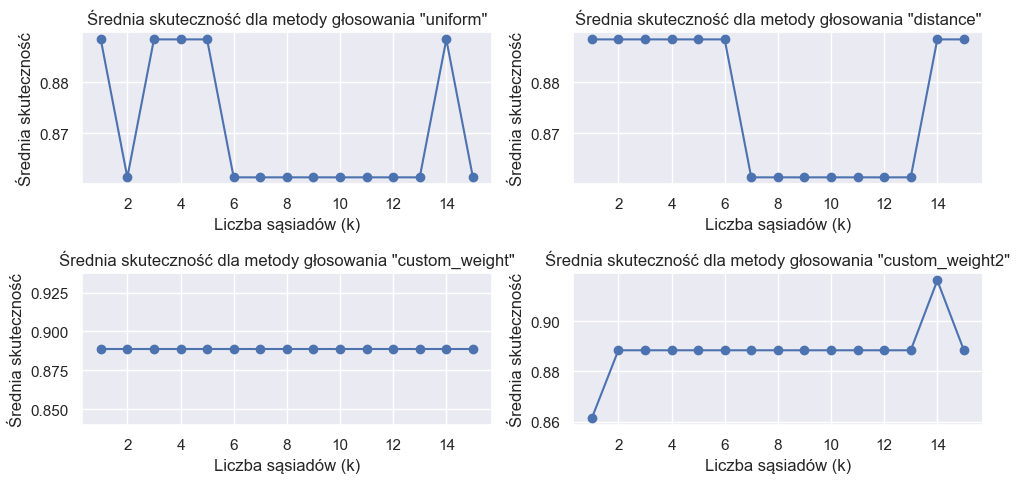

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def custom_weight(distances):
    return np.exp(-(distances ** 2))

def custom_weight2(distances):
    max_distance = np.max(distances)
    return np.where(distances <= max_distance, 1 - distances / max_distance, 0)

num_k = range(1, 16)
voting_methods = ['uniform', 'distance', 'custom_weight', 'custom_weight2']
mean_scores = {'uniform': [], 'distance': [], 'custom_weight': [], 'custom_weight2': []}
scores_list = {'uniform': [], 'distance': [], 'custom_weight': [], 'custom_weight2': []}


for voting_method in voting_methods:
    for k in num_k:
        if voting_method == 'custom_weight':
            knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=custom_weight)
        elif voting_method == 'custom_weight2':
            knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=custom_weight2)
        else:
            knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=voting_method)
        
        knn_classifier.fit(X_train, y_train)
        y_pred = knn_classifier.predict(X_test)
        scores = f1_score(y_test, y_pred, average='macro')
        
        scores_list[voting_method].append(scores)
        mean_score = scores.mean()
        mean_scores[voting_method].append(mean_score)
        
plt.figure(figsize=(10, 5))

# uniform
plt.subplot(2, 2, 1)
plt.plot(num_k, mean_scores['uniform'], marker='o')
plt.title('Średnia skuteczność dla metody głosowania "uniform"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

# distance
plt.subplot(2, 2, 2)
plt.plot(num_k, mean_scores['distance'], marker='o')
plt.title('Średnia skuteczność dla metody głosowania "distance"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

#custom1
plt.subplot(2, 2, 3)
plt.plot(num_k, mean_scores['custom_weight'], marker='o')
plt.title('Średnia skuteczność dla metody głosowania "custom_weight"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

#custom2
plt.subplot(2, 2, 4)
plt.plot(num_k, mean_scores['custom_weight2'], marker='o')
plt.title('Średnia skuteczność dla metody głosowania "custom_weight2"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

plt.tight_layout()
plt.show()

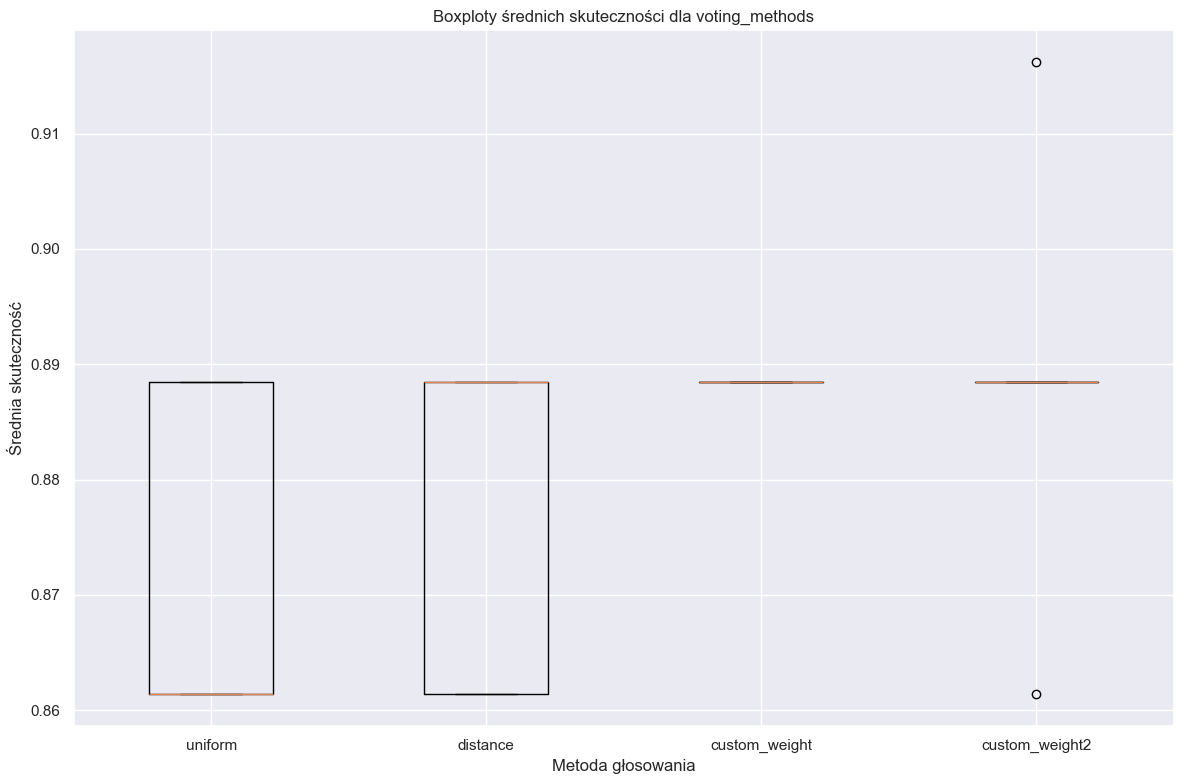

In [127]:
generate_mean_boxplots(mean_scores)

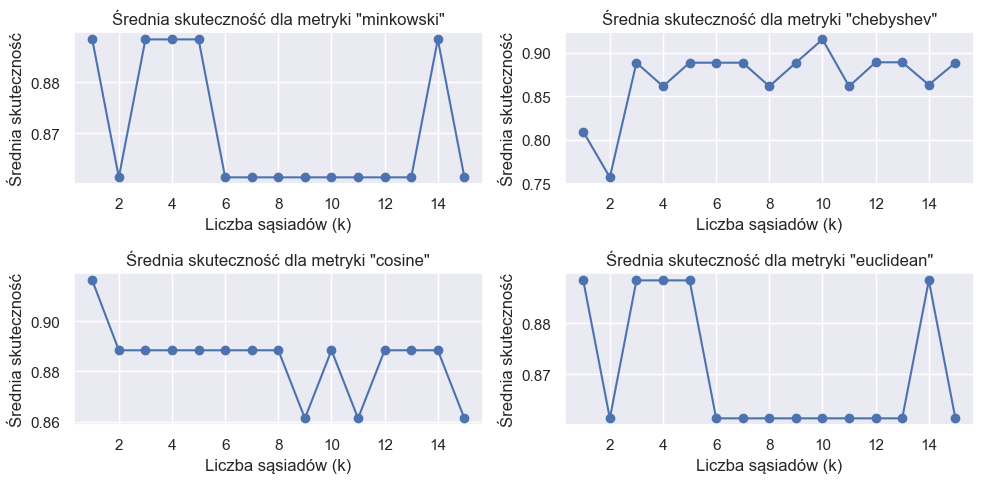

In [128]:
num_k = range(1, 16)
metrics = ['minkowski', 'chebyshev', 'cosine', 'euclidean']
mean_scores2 = {'minkowski': [], 'chebyshev': [], 'cosine': [], 'euclidean': []}

for metric in metrics:
    for k in num_k:
        knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_classifier.fit(X_train, y_train)
        y_pred = knn_classifier.predict(X_test)
        scores = f1_score(y_test, y_pred, average='macro')
        
        mean_score = scores.mean()
        mean_scores2[metric].append(mean_score)

# Tworzenie wykresów
plt.figure(figsize=(10, 5))

# minkowski
plt.subplot(2, 2, 1)
plt.plot(num_k, mean_scores2['minkowski'], marker='o')
plt.title('Średnia skuteczność dla metryki "minkowski"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

# chebyshev
plt.subplot(2, 2, 2)
plt.plot(num_k, mean_scores2['chebyshev'], marker='o')
plt.title('Średnia skuteczność dla metryki "chebyshev"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

plt.subplot(2, 2, 3)
plt.plot(num_k, mean_scores2['cosine'], marker='o')
plt.title('Średnia skuteczność dla metryki "cosine"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

plt.subplot(2, 2, 4)
plt.plot(num_k, mean_scores2['euclidean'], marker='o')
plt.title('Średnia skuteczność dla metryki "euclidean"')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia skuteczność')

plt.tight_layout()
plt.show()

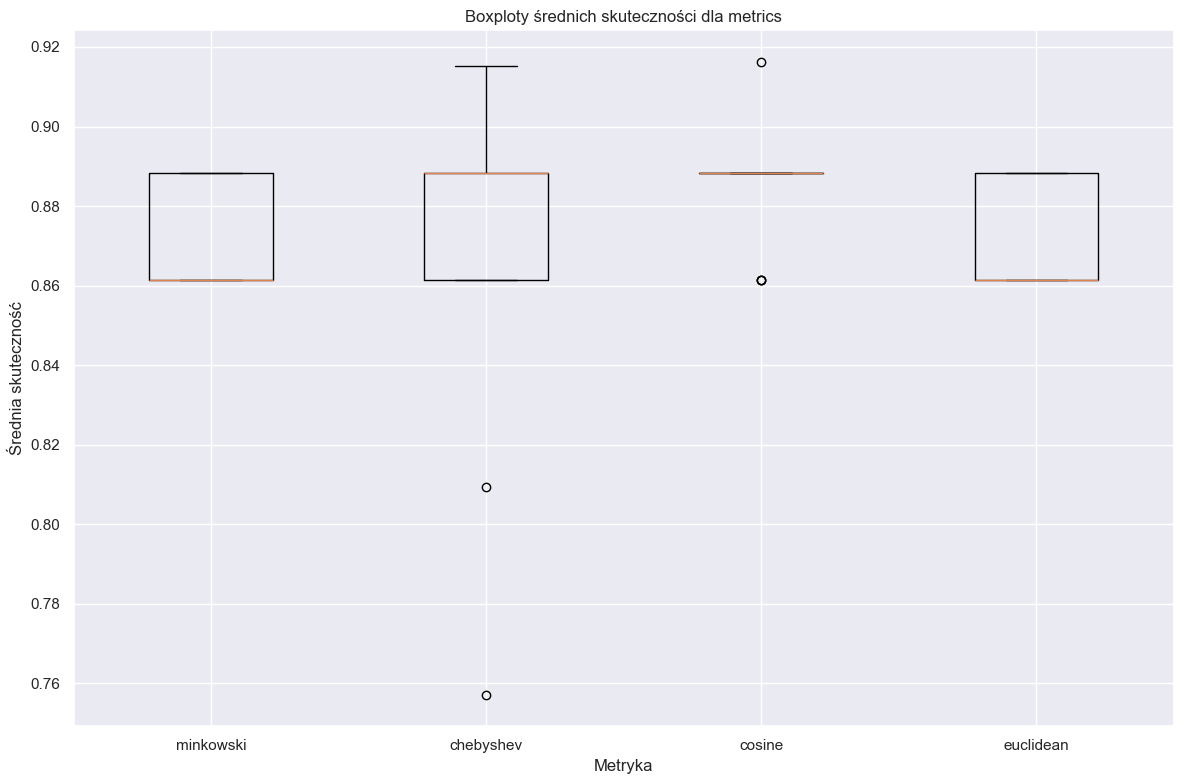

In [129]:
generate_mean_boxplots2(mean_scores2)